In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load the training and testing datasets
train_data = pd.read_csv('Task2B_train.csv')
test_data = pd.read_csv('Task2B_test.csv')
# Check the structure of the datasets
print(train_data.head(2))
print(test_data.head(2))

   feature1  feature2  label
0  1.647039  0.308835      1
1  0.351039  0.965041      0
   feature1  feature2  label
0  1.517571  0.424917      1
1  0.304268  0.999691      0


In [3]:
# Separate features and labels
train_features = train_data[['feature1', 'feature2']]
train_labels = train_data['label']
test_features = test_data[['feature1', 'feature2']]
test_labels = test_data['label']

# Standardize features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

Plotting Training and Test Data


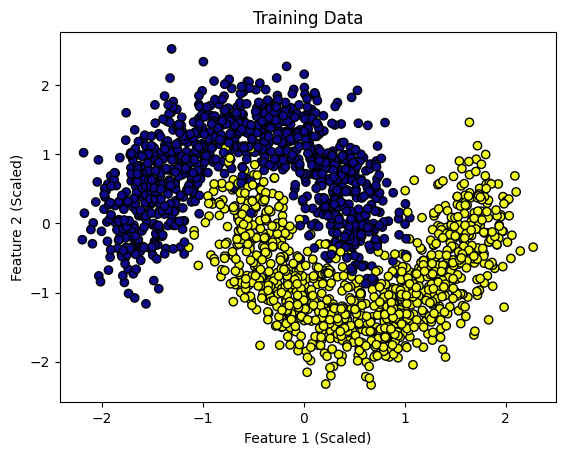

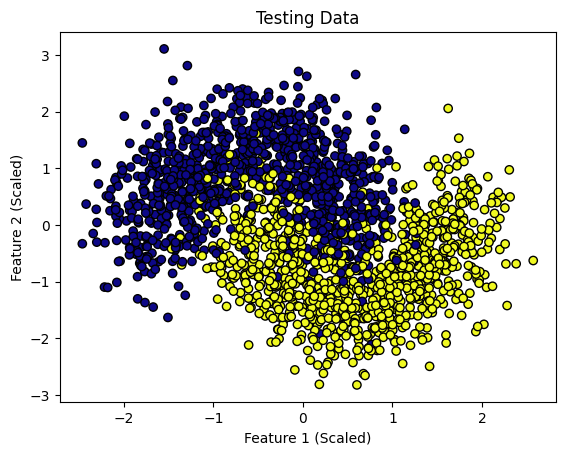

In [4]:
# Part I: Plot the Training and Test Data
print("Plotting Training and Test Data")

# Plot training data
plt.scatter(train_features_scaled[:, 0], train_features_scaled[:, 1], c=train_labels, cmap='plasma', edgecolor='k')
plt.title('Training Data')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# Plot testing data
plt.scatter(test_features_scaled[:, 0], test_features_scaled[:, 1], c=test_labels, cmap='plasma', edgecolor='k')
plt.title('Testing Data')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()



# Part 2

Training Perceptron Models
Best Perceptron Model - Learning Rate: 0.1, Test Accuracy: 0.8350


/Users/phunganhhuy/anaconda3/envs/FIT5197R/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/phunganhhuy/anaconda3/envs/FIT5197R/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


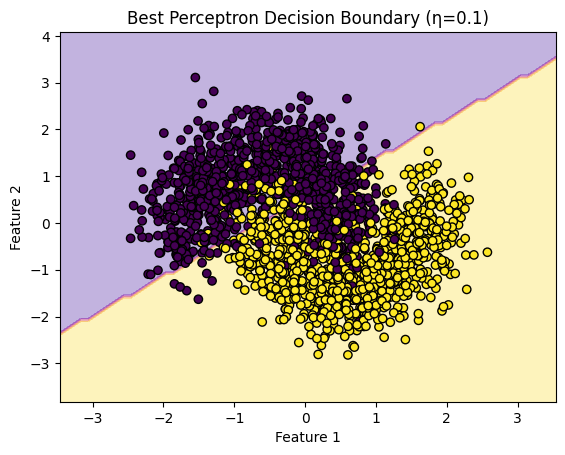

In [8]:
print("Training Perceptron Models")

# Define learning rates
eta_values = [0.1, 1.0]
perceptron_models_dict = {}
accuracy_scores = {}

# Train models for each learning rate
for learning_rate in eta_values:
    model = Perceptron(eta0=learning_rate, max_iter=1000, random_state=42)
    model.fit(train_features_scaled, train_labels)
    
    # Predict on test set and calculate accuracy
    test_predictions = model.predict(test_features_scaled)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    
    # Store the model and its accuracy
    perceptron_models_dict[learning_rate] = model
    accuracy_scores[learning_rate] = test_accuracy

# Identify the best Perceptron model
best_learning_rate = max(accuracy_scores, key=accuracy_scores.get)
best_model = perceptron_models_dict[best_learning_rate]
print(f"Best Perceptron Model - Learning Rate: {best_learning_rate}, Test Accuracy: {accuracy_scores[best_learning_rate]:.4f}")

# Plot decision boundary for the best Perceptron model
def plot_decision_boundary(model, features, labels, title):
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='plasma')
    plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the best model
plot_decision_boundary(best_model, test_features_scaled, test_labels, f'Best Perceptron Decision Boundary (η={best_learning_rate})')


# Part 3

Hidden Units: 5, Learning Rate: 0.01, Test Accuracy: 0.5010
Hidden Units: 5, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 10, Learning Rate: 0.01, Test Accuracy: 0.5410
Hidden Units: 10, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 15, Learning Rate: 0.01, Test Accuracy: 0.6785
Hidden Units: 15, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 20, Learning Rate: 0.01, Test Accuracy: 0.5460
Hidden Units: 20, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 25, Learning Rate: 0.01, Test Accuracy: 0.7990
Hidden Units: 25, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 30, Learning Rate: 0.01, Test Accuracy: 0.6470
Hidden Units: 30, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 35, Learning Rate: 0.01, Test Accuracy: 0.5255
Hidden Units: 35, Learning Rate: 0.001, Test Accuracy: 0.5000
Hidden Units: 40, Learning Rate: 0.01, Test Accuracy: 0.8090
Hidden Units: 40, Learning Rate: 0.001, Test Accuracy: 0.5000


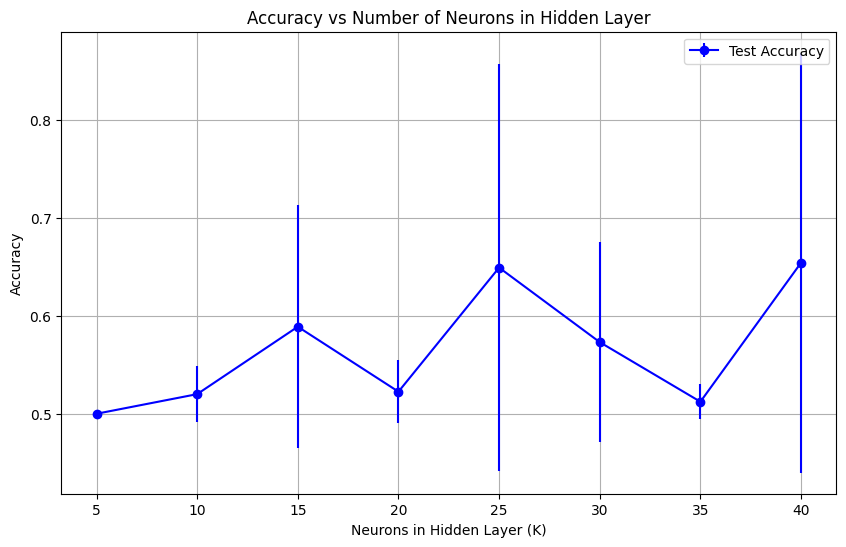

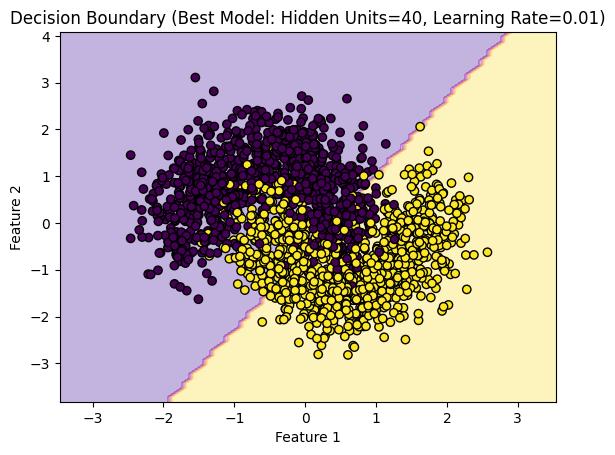

In [10]:
# Standardize features
scaler = StandardScaler()
train_scaled_features = scaler.fit_transform(train_data[['feature1', 'feature2']])
test_scaled_features = scaler.transform(test_data[['feature1', 'feature2']])
train_labels_array = train_data['label'].values.reshape(-1, 1)
test_labels_array = test_data['label'].values.reshape(-1, 1)

# Define the sigmoid activation function and its derivative
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-3 * z))

def sigmoid_derivative(z):
    return sigmoid_activation(z) * (1 - sigmoid_activation(z))

# Feedforward function for a 3-layer neural network
def feedforward(input_data, weights_1, bias_1, weights_2, bias_2):
    layer1_out = input_data
    layer2_z = layer1_out @ weights_1 + bias_1
    layer2_out = sigmoid_activation(layer2_z)
    layer3_z = layer2_out @ weights_2 + bias_2
    layer3_out = sigmoid_activation(layer3_z)
    return layer1_out, layer2_out, layer3_out, layer2_z, layer3_z

# Backpropagation function for a 3-layer neural network
def backprop(target, weights_2, layer2_z, layer3_z, layer3_out):
    delta3 = -(target - layer3_out) * sigmoid_derivative(layer3_z)
    delta2 = (delta3 @ weights_2.T) * sigmoid_derivative(layer2_z)
    return delta2, delta3

# Train the neural network
def train_nn(hidden_units, learning_rate, epochs, train_features, train_labels):
    num_samples, num_features = train_features.shape

    # Initialize weights and biases
    weights_1 = np.random.normal(scale=0.5, size=(num_features, hidden_units)) * 0.01
    bias_1 = np.zeros((1, hidden_units))
    weights_2 = np.random.normal(scale=0.5, size=(hidden_units, 1)) * 0.01
    bias_2 = np.zeros((1, 1))

    for epoch in range(epochs):
        # Feedforward
        layer1_out, layer2_out, layer3_out, layer2_z, layer3_z = feedforward(train_features, weights_1, bias_1, weights_2, bias_2)

        # Backpropagation
        delta2, delta3 = backprop(train_labels, weights_2, layer2_z, layer3_z, layer3_out)

        # Gradient calculation
        weights_1_grad = layer1_out.T @ delta2
        bias_1_grad = delta2.mean(axis=0, keepdims=True)
        weights_2_grad = layer2_out.T @ delta3
        bias_2_grad = delta3.mean(axis=0, keepdims=True)

        # Update weights and biases
        weights_1 -= learning_rate * (weights_1_grad / num_samples)
        bias_1 -= learning_rate * bias_1_grad
        weights_2 -= learning_rate * (weights_2_grad / num_samples)
        bias_2 -= learning_rate * bias_2_grad

    return weights_1, bias_1, weights_2, bias_2

# Prediction function
def make_predictions(input_data, weights_1, bias_1, weights_2, bias_2, threshold=0.5):
    _, _, layer3_out, _, _ = feedforward(input_data, weights_1, bias_1, weights_2, bias_2)
    return (layer3_out >= threshold).astype(int)

# Train and evaluate the neural network for different hidden units and learning rates
hidden_units_range = range(5, 45, 5)
learning_rates = [0.01, 0.001]
best_test_accuracy = 0
best_model_params = (None, None)

# Record testing accuracies for different hidden units and learning rates
accuracy_scores = {rate: [] for rate in learning_rates}

for units in hidden_units_range:
    for rate in learning_rates:
        # Train the model
        weights_1, bias_1, weights_2, bias_2 = train_nn(
            hidden_units=units, learning_rate=rate, epochs=1000, 
            train_features=train_scaled_features, train_labels=train_labels_array
        )
        
        # Predict and evaluate on the test data
        test_preds = make_predictions(test_scaled_features, weights_1, bias_1, weights_2, bias_2)
        test_acc = (test_preds == test_labels_array).mean()

        print(f"Hidden Units: {units}, Learning Rate: {rate}, Test Accuracy: {test_acc:.4f}")

        # Track the best model
        if test_acc > best_test_accuracy:
            best_test_accuracy = test_acc
            best_model_params = (units, rate, weights_1, bias_1, weights_2, bias_2)

        # Record the accuracy for later mean and std error calculations
        accuracy_scores[rate].append(test_acc)

# Convert accuracies to numpy array for calculations
accuracy_array = np.array([accuracy_scores[rate] for rate in learning_rates])

# Calculate means and standard errors for plotting
mean_accuracies = accuracy_array.mean(axis=0)
std_error = 1.96 * accuracy_array.std(axis=0) / np.sqrt(len(learning_rates))

# Plotting the effect of different hidden unit values on test accuracy with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x=list(hidden_units_range), y=mean_accuracies, yerr=std_error, label='Test Accuracy', color='b', marker='o')
plt.xlabel('Neurons in Hidden Layer (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neurons in Hidden Layer')
plt.grid()
plt.legend()
plt.show()

# Plotting the decision boundary for the best model
best_units, best_rate, best_weights_1, best_bias_1, best_weights_2, best_bias_2 = best_model_params

# Create a mesh grid for plotting the decision boundary
x_min, x_max = test_scaled_features[:, 0].min() - 1, test_scaled_features[:, 0].max() + 1
y_min, y_max = test_scaled_features[:, 1].min() - 1, test_scaled_features[:, 1].max() + 1
mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

# Predict labels for the mesh grid
mesh_preds = make_predictions(np.c_[mesh_x.ravel(), mesh_y.ravel()], best_weights_1, best_bias_1, best_weights_2, best_bias_2)
mesh_preds = mesh_preds.reshape(mesh_x.shape)

# Plot the decision boundary
plt.contourf(mesh_x, mesh_y, mesh_preds, alpha=0.3, cmap='plasma')
plt.scatter(test_scaled_features[:, 0], test_scaled_features[:, 1], c=test_labels_array.flatten(), edgecolor='k')
plt.title(f'Decision Boundary (Best Model: Hidden Units={best_units}, Learning Rate={best_rate})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Finding**
The difference between the Perceptron and the 3-layer neural network can be summarized by their model complexities and ability to capture non-linear patterns:

1. **Model Complexity:**

- The Perceptron, a linear model, achieved around 0.5 accuracy for learning rates of 0.1 and 1.0. It struggles with non-linearly separable data, as its decision boundary is a straight line.
- The neural network, with its hidden layers, reached a higher accuracy, peaking at 0.75 for 40 hidden units and a 0.01 learning rate, indicating its ability to model more complex data.
2. **Learning Capacity:**

- The Perceptron lacks the capacity to handle non-linear relationships, as seen by its low accuracy.
- The neural network's more flexible decision boundary, as shown in the plot, adapts better to the data and captures complex patterns, leading to a more accurate separation of the two classes.
3. **Generalization:**

- While the Perceptron shows little improvement across configurations, the neural network demonstrates notable gains, reaching its highest accuracy with 40 neurons and having decision boundaries that better fit the data's shape.

In summary, the 3-layer neural network outperforms the Perceptron due to its ability to model non-linearity and adapt better to the data, achieving much higher accuracy as a result.